In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from pathlib import Path

/tmp/ipykernel_911753/3879962859.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
path = Path("./silver-train.tsv")
assert path.exists(), "Error, file doesn't exit"

In [4]:
columns = ["subject", "object", "sentence", "relation"]
df = pd.read_table(path, header=None, names=columns, sep='\t')
df

,subject,object,sentence,relation
0,yago:Ashok_Kumar_Garg,Ashok Kumar Garg,Ashok Kumar Garg (born 7 July 1969) is an Indi...,<label>
1,yago:Ashok_Kumar_Garg,7 July 1969,Ashok Kumar Garg (born 7 July 1969) is an Indi...,<birthDate>
2,yago:Ashok_Kumar_Garg,Indian,Ashok Kumar Garg (born 7 July 1969) is an Indi...,no_rel
3,yago:Ashok_Kumar_Garg,57 kg,He competed in the men's freestyle 57 kg at th...,no_rel
4,yago:Ashok_Kumar_Garg,1993,"In 1993, he won the Arjuna Award.",no_rel
...,...,...,...,...
6325,yago:Calla__u0028_band_u0029_,1997,Calla is an American indie rock band formed in...,no_rel
6326,yago:Calla__u0028_band_u0029_,Brooklyn,"The band has been based in Brooklyn, New York ...",no_rel
6327,yago:Calla__u0028_band_u0029_,New York,"The band has been based in Brooklyn, New York ...",no_rel
6328,yago:Calla__u0028_band_u0029_,2007,"They have been on hiatus since 2007, after tou...",no_rel


## Training relations distribution

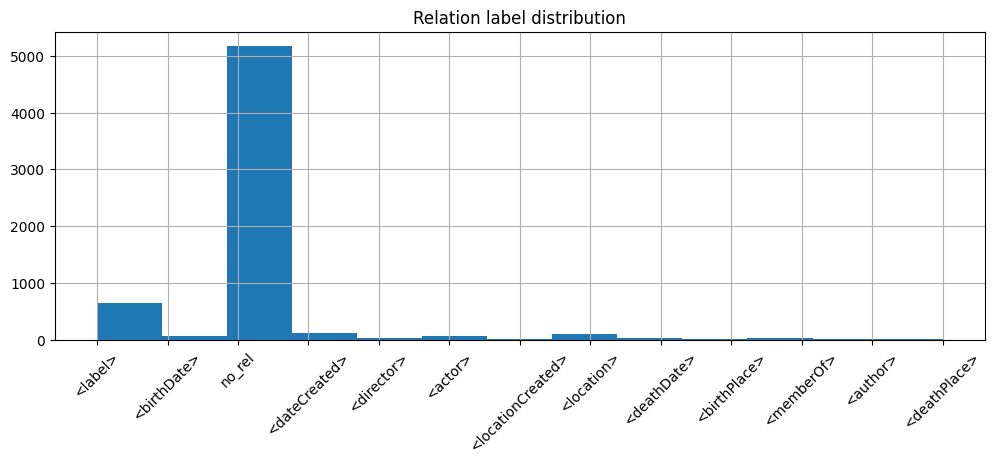

In [5]:
nbins = df['relation'].dropna().nunique()
ax = df['relation'].dropna().hist(bins=nbins, xrot=45., figsize=(12, 4))
ax.set_title("Relation label distribution");

## Test results

In [2]:
path = Path("./results-dev.tsv")
assert path.exists(), "Error, file doesn't exit"
test_result_df = pd.read_table(path, header=None, names=["subject", "relation", "object"])
test_result_df

,subject,relation,object
0,yago:Mike_Shanahan__u0028_ice_hockey_u0029_,no_rel,10 - percent
1,yago:Caravaggio,no_rel,Baroque
2,yago:Peaches__u0028_musician_u0029_,no_rel,Fresh Meat
3,yago:John_Oates,no_rel,Hall & Oates
4,yago:Supergirl__u0028_Matrix_u0029_,no_rel,2
...,...,...,...
1280,yago:Ceará,no_rel,Paraíba
1281,yago:The_Mystery_of_Edwin_Drood,<label>,Drood
1282,yago:Joe_Wright__u0028_basketball_u0029_,<label>,Wright
1283,yago:Brian_Roberts__u0028_soccer_u0029_,<label>,Brian Roberts


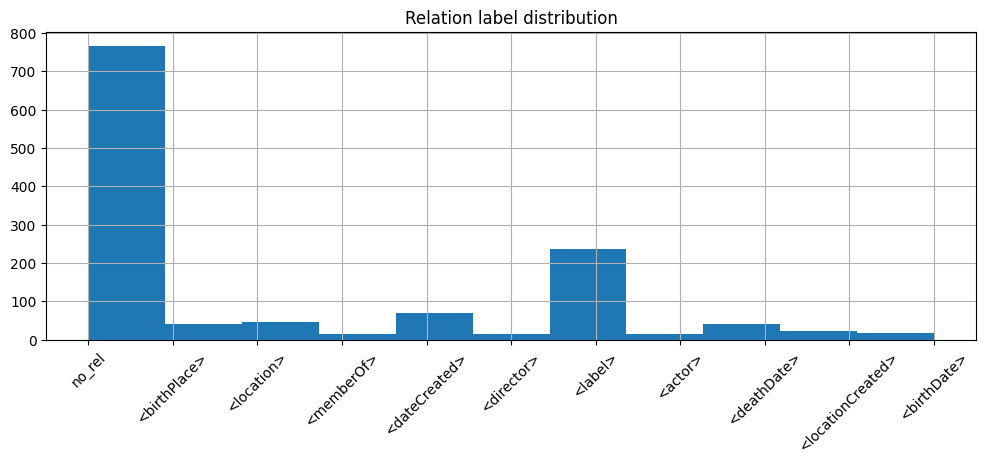

In [3]:
nbins = test_result_df['relation'].dropna().nunique()
ax = test_result_df['relation'].dropna().hist(bins=nbins, xrot=45., figsize=(12, 4))
ax.set_title("Relation label distribution");

In [4]:
path = Path("./results-test.tsv")
assert path.exists(), "Error, file doesn't exit"
test_result_df = pd.read_table(path, header=None, names=["subject", "relation", "object"])
test_result_df

,subject,relation,object
0,yago:Endless_Road,no_rel,Country Music Awards
1,yago:Clinton_u002C__Indiana,no_rel,2010
2,yago:San_Julián_u002C__Jalisco,<label>,San Julian
3,yago:Andrew_Kerr__u0028_civil_servant_u0029_,no_rel,Cornwall
4,yago:The_Meddler,<actor>,J. K. Simmons
...,...,...,...
709,yago:Geordie,no_rel,Scottish
710,yago:Ashok_Kumar__u0028_cinematographer_u0029_,no_rel,J. D. Thottan
711,yago:Geordie,no_rel,England
712,yago:Geordie,<label>,Geordie


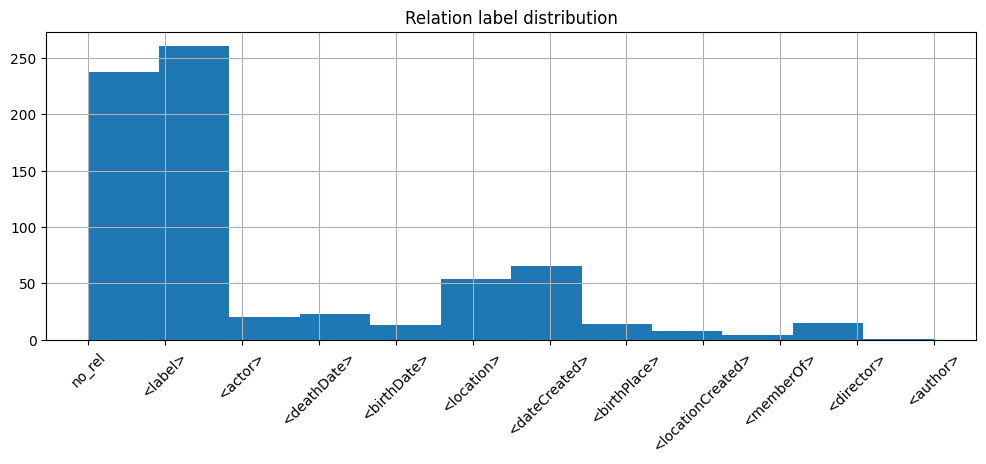

In [5]:
nbins = test_result_df['relation'].dropna().nunique()
ax = test_result_df['relation'].dropna().hist(bins=nbins, xrot=45., figsize=(12, 4))
ax.set_title("Relation label distribution");